In [1]:
import pandas as pd 
import numpy as np



In [2]:
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')



/var/folders/fc/s4g69vbs2p507h3cbj53xmph0000gp/T/ipykernel_23066/553756051.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


## Data cleaning and info

In [3]:
# Print the shapes of the dataframes
print(
    f"-------------*********** shapes of books, ratings, and users **********-------------------\n"
    f"books: {books.shape}, ratings: {ratings.shape}, users: {users.shape}\n"
)

# Calculate and print null percentage for each dataframe
print(
    f"-------------*********** null percentage in books **********-------------------\n"
    f"{(books.isna().sum() / books.shape[0]) * 100}\n"
    f"-------------*********** null percentage in ratings **********-------------------\n"
    f"{(ratings.isna().sum() / ratings.shape[0]) * 100}\n"
    f"-------------*********** null percentage in users **********-------------------\n"
    f"{(users.isna().sum() / users.shape[0]) * 100}\n"
)

# List of dataframes for iteration
dataframes = [("books", books), ("ratings", ratings), ("users", users)]

# Loop through each dataframe and print the number of unique values for each column
for df_name, df in dataframes:
    print(f"-------------*********** unique values in {df_name} **********-------------------\n")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()}")
    print("\n")


-------------*********** shapes of books, ratings, and users **********-------------------
books: (271360, 8), ratings: (1149780, 3), users: (278858, 3)

-------------*********** null percentage in books **********-------------------
ISBN                   0.000000
Book-Title             0.000000
Book-Author            0.000737
Year-Of-Publication    0.000000
Publisher              0.000737
Image-URL-S            0.000000
Image-URL-M            0.000000
Image-URL-L            0.001106
dtype: float64
-------------*********** null percentage in ratings **********-------------------
User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64
-------------*********** null percentage in users **********-------------------
User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64

-------------*********** unique values in books **********-------------------

ISBN: 271360
Book-Title: 242135
Book-Author: 102022
Year-Of-Publication: 202
Publisher: 16807
Image-

/var/folders/fc/s4g69vbs2p507h3cbj53xmph0000gp/T/ipykernel_23066/465028852.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users.Age.fillna(users.Age.mean(), inplace=True)


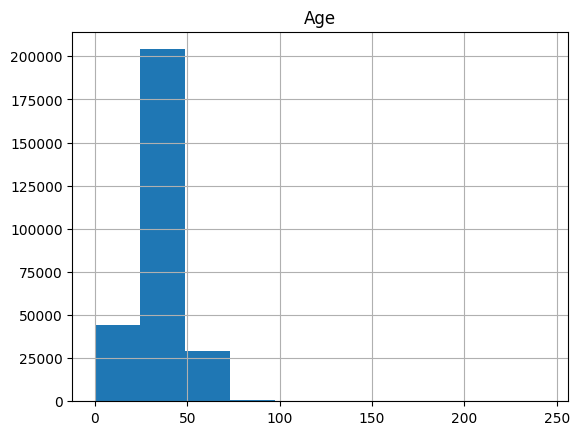

In [4]:
users = users[(users.Age<100 )|(users.Age.isna())| (users.Age>2 )]
users.Age.fillna(users.Age.mean(), inplace=True)
users.hist('Age')
books.dropna(inplace=True)

In [5]:
books.columns, ratings.columns, users.columns

(Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
        'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
       dtype='object'),
 Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object'),
 Index(['User-ID', 'Location', 'Age'], dtype='object'))

In [6]:
book_count = pd.DataFrame(books['Book-Title'].value_counts())
book_count.reset_index(inplace=True)
book_count



,Book-Title,count
0,Selected Poems,27
1,Little Women,24
2,Wuthering Heights,21
3,Dracula,20
4,The Secret Garden,20
...,...,...
242124,On a Clear Day You Can See General Motors: Joh...,1
242125,What Every Kid Should Know,1
242126,The Seventh Enemy (A Brady Coyne Mystery),1
242127,A Brace of Skeet,1


In [7]:
ratings_books = ratings.merge(books,on='ISBN')
ratings_books.isna().sum(), ratings_books.shape

(User-ID                0
 ISBN                   0
 Book-Rating            0
 Book-Title             0
 Book-Author            0
 Year-Of-Publication    0
 Publisher              0
 Image-URL-S            0
 Image-URL-M            0
 Image-URL-L            0
 dtype: int64,
 (1031128, 10))

,Book-Title,Book_Rating_Count,Book_Rating_Mean
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00
...,...,...,...
241060,Ã?Â?lpiraten.,2,0.00
241061,Ã?Â?rger mit Produkt X. Roman.,4,5.25
241062,Ã?Â?sterlich leben.,1,7.00
241063,Ã?Â?stlich der Berge.,3,2.67


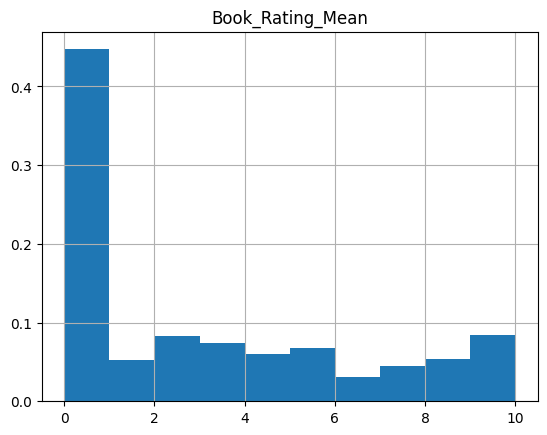

In [8]:
df = ratings_books.groupby('Book-Title').agg(
    Book_Rating_Count=('Book-Rating', 'count'),
    Book_Rating_Mean=('Book-Rating', lambda x: round(x.mean(), 2))
).reset_index()

df.hist('Book_Rating_Mean', density=True)

df#.sort_values(by = ['Book-Rating'])


In [9]:

ratings_books


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1031123,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031124,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031125,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031126,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [10]:
readers = ratings_books.groupby('User-ID').filter(lambda x: len(x) > 100)
fin_df = readers.groupby('Book-Title').filter(lambda x: len(x) > 25)
fin_df

df = fin_df.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
df.fillna(0, inplace= True)
df



User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,275020,275970,276463,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zlata's Diary: A Child's Life in Sarajevo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Applying collaborative filtering using cosine similarity

In [11]:

from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(df)
similarity_scores


array([[1.        , 0.        , 0.        , ..., 0.        , 0.04183134,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.1562553 ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.06783072,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.09410287,
        0.07980498],
       [0.04183134, 0.1562553 , 0.06783072, ..., 0.09410287, 1.        ,
        0.01961129],
       [0.        , 0.        , 0.        , ..., 0.07980498, 0.01961129,
        1.        ]], shape=(2844, 2844))

In [12]:
df.index



Index(['10 Lb. Penalty', '101 Dalmatians', '16 Lighthouse Road', '1984',
       '1st to Die: A Novel', '2010: Odyssey Two', '204 Rosewood Lane',
       '2061: Odyssey Three', '24 Hours', '2nd Chance',
       ...
       'You Can't Scare Me! (Goosebumps, No 15)',
       'You'll Never Eat Lunch in This Town Again', 'Young Wives',
       'Your Erroneous Zones',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zia', 'Zlata's Diary: A Child's Life in Sarajevo', 'Zoya',
       '\O\" Is for Outlaw"',
       '\Surely You're Joking, Mr. Feynman!\": Adventures of a Curious Character"'],
      dtype='object', name='Book-Title', length=2844)

### Recommend book

In [13]:
def recommend(book_name):
    # index fetch
    index = np.where(df.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == df.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        
        data.append(item)
    
    return data


In [14]:

recommend("The Two Towers (The Lord of the Rings, Part 2)")



[['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
  'J.R.R. TOLKIEN'],
 ['The Return of the King (The Lord of the Rings, Part 3)', 'J.R.R. TOLKIEN'],
 ['Foundation and Empire (Foundation Novels (Paperback))', 'Isaac Asimov'],
 ['The Hobbit : The Enchanting Prelude to The Lord of the Rings',
  'J.R.R. TOLKIEN'],
 ['Foundation (Foundation Novels (Paperback))', 'Isaac Asimov']]

In [15]:
books[books['Book-Title'].str.contains('Sherlock')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2041,014029645X,Sherlock Holmes and the Rune Stone Mystery (Sh...,Larry Millett,2000,Penguin Books,http://images.amazon.com/images/P/014029645X.0...,http://images.amazon.com/images/P/014029645X.0...,http://images.amazon.com/images/P/014029645X.0...
2633,0142003409,The Disappearance of Sherlock Holmes,Larry Millett,2003,Penguin Books,http://images.amazon.com/images/P/0142003409.0...,http://images.amazon.com/images/P/0142003409.0...,http://images.amazon.com/images/P/0142003409.0...
3702,0743407148,Sherlock Holmes vs. Dracula,Loren Estleman,2000,I Books,http://images.amazon.com/images/P/0743407148.0...,http://images.amazon.com/images/P/0743407148.0...,http://images.amazon.com/images/P/0743407148.0...
4675,0375403671,Night Watch : A Long-Lost Adventure in Which S...,STEPHEN KENDRICK,2001,Pantheon,http://images.amazon.com/images/P/0375403671.0...,http://images.amazon.com/images/P/0375403671.0...,http://images.amazon.com/images/P/0375403671.0...
4676,0670888214,Sherlock Holmes and the Rune Stone Mystery: Fr...,Larry Millett,1999,Viking Books,http://images.amazon.com/images/P/0670888214.0...,http://images.amazon.com/images/P/0670888214.0...,http://images.amazon.com/images/P/0670888214.0...
...,...,...,...,...,...,...,...,...
263356,0140079076,The Further Adventures of Sherlock Holmes,Richard Lancelyn Green,1986,Penguin Putnam,http://images.amazon.com/images/P/0140079076.0...,http://images.amazon.com/images/P/0140079076.0...,http://images.amazon.com/images/P/0140079076.0...
264572,0380780895,Sir Arthur Conan Doyle's Adventures of Sherloc...,Catherine Edwards Sadler,1985,Harpercollins Juvenile Books,http://images.amazon.com/images/P/0380780895.0...,http://images.amazon.com/images/P/0380780895.0...,http://images.amazon.com/images/P/0380780895.0...
268264,019283519X,The Hound of the Baskervilles: Another Adventu...,Arthur Conan Doyle,1998,Oxford University Press,http://images.amazon.com/images/P/019283519X.0...,http://images.amazon.com/images/P/019283519X.0...,http://images.amazon.com/images/P/019283519X.0...
268941,0517263289,Illustrated Sherlock Holmes Treas Ja,Sir Arthur Conan Doyle,1988,Random House Value Publishing,http://images.amazon.com/images/P/0517263289.0...,http://images.amazon.com/images/P/0517263289.0...,http://images.amazon.com/images/P/0517263289.0...
